In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_2015 = pd.read_csv('Hap-2015.csv')
df_2016 = pd.read_csv('Hap-2016.csv')
df_2017 = pd.read_csv('Hap-2017.csv')

In [3]:
data = [df_2015,df_2016,df_2017]

In [4]:
for item in range (len(data)):
    data[item].info()
    print("=====")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank          

# Ubah Nama Kolom di df_2017

In [5]:
df = data[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [6]:
kolom = list(df.columns)
kolomFix = []
for item in kolom:
    if ('.' in item):
        if('..') in item:
            item = item.replace('..', ' (').replace('.', ' ')[:-1] + ')'
        else:
            item = item.replace('.', ' ')
    kolomFix.append(item)
kolomFix

df.columns = kolomFix

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness Rank                   155 non-null int64
Happiness Score                  155 non-null float64
Whisker high                     155 non-null float64
Whisker low                      155 non-null float64
Economy (GDP per Capita)         155 non-null float64
Family                           155 non-null float64
Health (Life Expectancy)         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust (Government Corruption)    155 non-null float64
Dystopia Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


# Negara Yang ada ditahun 2015 Kemudian Menghilang di Tahun 2016 dan 2017

In [8]:
a = list(data[0]['Country'])
b = list(data[1]['Country'])
c = list(data[2]['Country'])

print( 'Negara yang tidak ada, menghilang dari rank : ' + '\n')
for item in a:
    if (item not in b) and (item not in c):
        print(item)

Negara yang tidak ada, menghilang dari rank : 

Oman
Somaliland region
Swaziland
Djibouti


# Statistik Negara Indonesia Tercinta

In [9]:
tahun = [2015,2016,2017]
eco = []
trust = []
health = []
score = []
rank = []

for item in data:
    indo = item[item['Country'] == "Indonesia"]
    eco.append(indo['Economy (GDP per Capita)'].values[0])
    trust.append(indo['Trust (Government Corruption)'].values[0])
    health.append(indo['Health (Life Expectancy)'].values[0])
    score.append(indo['Happiness Score'].values[0])
    rank.append(indo['Happiness Rank'].values[0])
    
dx = {
    'Tahun' : tahun,
    'Economy (GDP per Capita)' : eco,
    'Trust (Government Corruption)' : trust,
    'Health (Life Expectancy)' : health,
    'Happiness Score' : score,
    'Happiness Rank' : rank   
}
dx = pd.DataFrame(dx)
dx

,Tahun,Economy (GDP per Capita),Trust (Government Corruption),Health (Life Expectancy),Happiness Score,Happiness Rank
0,2015,0.828270,0.000000,0.637930,5.399,74
1,2016,0.995539,0.015317,0.492346,5.262,81
2,2017,0.951040,0.003220,0.493740,5.314,79


In [10]:
rank_1 = []
rank_2 = []
rank_3 = []
for item in data:
    rank_1.append(item[item['Happiness Rank'] == 1]['Country'].values[0])
    rank_2.append(item[item['Happiness Rank'] == 2]['Country'].values[0])
    rank_3.append(item[item['Happiness Rank'] == 3]['Country'].values[0])

ds = {
    'tahun' : tahun,
    'Rank 1': rank_1,
    'Rank 2': rank_2,
    'Rank 3': rank_3
}
pd.DataFrame(ds).transpose()

,0,1,2
tahun,2015,2016,2017
Rank 1,Switzerland,Norway,Denmark
Rank 2,Iceland,Denmark,Switzerland
Rank 3,Denmark,Iceland,Iceland


In [11]:
kolom1 = df_2015.head(3)['Country'].values
kolom2 = df_2016.head(3)['Country'].values
kolom3 = df_2017.head(3)['Country'].values
dfs = pd.DataFrame({
    '2015' : kolom1,
    '2016' : kolom2,
    '2017' : kolom3
}, index=['Rank 1', 'Rank 2', 'Rank 3'])
dfs

,2015,2016,2017
Rank 1,Switzerland,Norway,Denmark
Rank 2,Iceland,Denmark,Switzerland
Rank 3,Denmark,Iceland,Iceland


In [12]:
dfx = data[2]
dfx3 = dfx.head(3)[['Country', 'Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Happiness Score']]
dfx3.index = ['Rank 1', 'Rank 2', 'Rank 3']
dfx3.transpose()


,Rank 1,Rank 2,Rank 3
Country,Denmark,Switzerland,Iceland
Economy (GDP per Capita),1.44178,1.52733,1.42666
Trust (Government Corruption),0.44453,0.41203,0.14975
Happiness Score,7.526,7.509,7.501


In [13]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
Tahun                            3 non-null int64
Economy (GDP per Capita)         3 non-null float64
Trust (Government Corruption)    3 non-null float64
Health (Life Expectancy)         3 non-null float64
Happiness Score                  3 non-null float64
Happiness Rank                   3 non-null int64
dtypes: float64(4), int64(2)
memory usage: 224.0 bytes


# Buat Plot Seperti Dibawah

Menggunakan Matplotlib

In [14]:
col = dfx.columns[1:]

In [15]:
col

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [16]:
dx['Tahun'].dtype

dtype('int64')

In [17]:
colx = dx[['Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Health (Life Expectancy)', 'Happiness Score', 'Happiness Rank']]
colx.columns[0]

'Economy (GDP per Capita)'

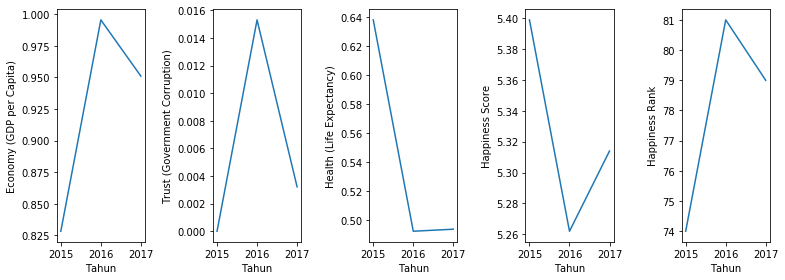

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize =(11,4))
for i in range(5):
    axes[i].plot(dx['Tahun'] , dx[colx.columns[i]])
    axes[i].set_ylabel(colx.columns[i])
    axes[i].set_xlabel('Tahun')

plt.tight_layout()

# Buatlah Chart Seperti Dibawah

link https://plot.ly/python/bar-charts/#grouped-bar-chart